## Data Analysis

------------------------------

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
import statsmodels.api as sm
import bioinfokit
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
from bioinfokit.analys import get_data, stat
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [3]:
# Import the original data files
df = pd.read_csv('../data/2017_diabetes_cleaned_vld.csv')

-----------------

#### Check the correlation coefficients between independent variables we selected.

In [4]:
df.corr()

,diabete,bmi,physhlth,menthlth,michd,hchol,hblpr,vpa,hvdr,smok,incom50,cllgr,sex,age65
diabete,1.000000,0.210833,0.146809,0.056580,0.159905,0.204120,0.248062,0.014981,-0.053850,0.005665,-0.125857,-0.094190,-0.015016,0.132430
bmi,0.210833,1.000000,0.099239,0.067553,0.049593,0.110099,0.219359,-0.081021,-0.042794,-0.019758,-0.068860,-0.111342,-0.066857,-0.069458
physhlth,0.146809,0.099239,1.000000,0.312718,0.152370,0.103281,0.133349,-0.017566,-0.018858,0.098688,-0.175275,-0.114640,0.027662,0.035409
menthlth,0.056580,0.067553,0.312718,1.000000,0.044789,0.033459,0.032318,-0.058492,0.033281,0.150113,-0.141509,-0.088569,0.073676,-0.108396
michd,0.159905,0.049593,0.152370,0.044789,1.000000,0.181809,0.203408,0.065844,-0.027933,0.027581,-0.099403,-0.070034,-0.090573,0.192954
hchol,0.204120,0.110099,0.103281,0.033459,0.181809,1.000000,0.305150,0.057872,-0.011543,-0.008207,-0.044550,-0.026217,-0.035180,0.214933
hblpr,0.248062,0.219359,0.133349,0.032318,0.203408,0.305150,1.000000,0.075230,-0.001852,0.000936,-0.123182,-0.098915,-0.068268,0.273105
vpa,0.014981,-0.081021,-0.017566,-0.058492,0.065844,0.057872,0.075230,1.000000,0.004309,-0.042292,-0.027104,0.005129,-0.027815,0.287091
hvdr,-0.053850,-0.042794,-0.018858,0.033281,-0.027933,-0.011543,-0.001852,0.004309,1.000000,0.086565,0.041799,0.015432,0.010208,-0.033264
smok,0.005665,-0.019758,0.098688,0.150113,0.027581,-0.008207,0.000936,-0.042292,0.086565,1.000000,-0.158872,-0.176802,-0.015933,-0.108993


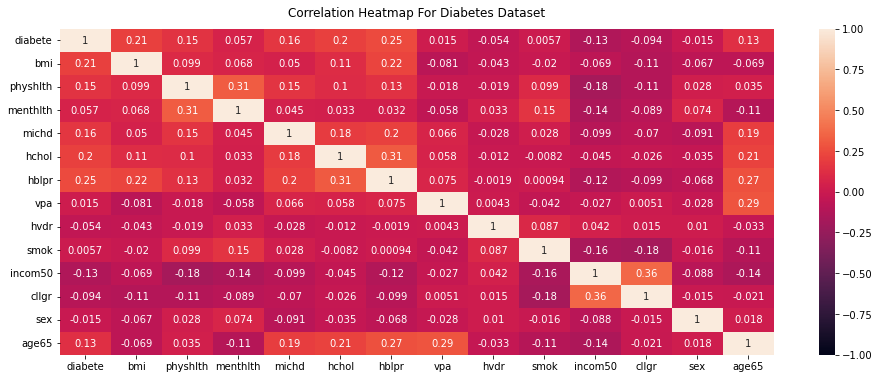

In [5]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap For Diabetes Dataset', fontdict={'fontsize':12}, pad=12);

##### Since all of the correlation coefficients are < 0.5, there is no obvious evidence of strong multicollinearity

------------------------

#### Multiple Linear Regression

In [6]:
# Perform the multiple linear regression 
X = df[['bmi', 'physhlth', 'menthlth', 'michd', 'hchol', 'hblpr', 'vpa', 
        'hvdr', 'smok', 'incom50', 'cllgr','sex', 'age65']]   # independent variables
y = df['diabete']   # dependent variables

# to get intercept -- this is optional
X = sm.add_constant(X)

# fit the regression model
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diabete   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     2421.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:53:39   Log-Likelihood:                -62042.
No. Observations:              211319   AIC:                         1.241e+05
Df Residuals:                  211305   BIC:                         1.243e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1840      0.004    -45.223      0.000      -0.192      -0.176
bmi            0.0092      0.000     72.138      0.000       0.009       0.009
physhlth       0.0034      0.000     33.308      0.000       0.003       0.004
menthlth       0.0005      0.000      4.415      0.000       0.000       0.001
michd          0.0982      0.003     35.370      0.000       0.093       0.104
hchol          0.0790      0.002     50.524      0.000       0.076       0.082
hblpr          0.0933      0.002     57.459      0.000       0.090       0.097
vpa        -1.287e-05   2.62e-06     -4.917      0.000    -1.8e-05   -7.74e-06
hvdr          -0.0538      0.003    -18.355      0.000      -0.060      -0.048
smok          -0.0052      0.002     -2.293      0.022      -0.010      -0.001
incom50       -0.0374      0.002    -23.544      0.000      -0.041      -0.034
cllgr         -0.0183      0.002    -11.846      0.000      -0.021      -0.015
sex            0.0042      0.001      2.894      0.004       0.001       0.007
age65          0.0445      0.002     26.248      0.000       0.041       0.048
==============================================================================
Omnibus:                    59349.208   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128546.358
Skew:                           1.674   Prob(JB):                         0.00
Kurtosis:                       4.840   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### The coefficient of determination (R-Squared) is 0.13 (~13%), which suggests that only ~13% of the variance in y can be explained by X variables. This indicates the multiple OLS model doesn't fit the dataset well.

In [7]:
# regression metrics
res= stat()
res.reg_metric(y=np.array(y), yhat=np.array(reg.predict(X)), resid=np.array(reg.resid))
res.reg_metric_df

/opt/conda/lib/python3.7/site-packages/bioinfokit/analys.py:1280: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((y - yhat) / y))


,Metrics,Value
0,Root Mean Square Error (RMSE),0.3245
1,Mean Squared Error (MSE),0.1053
2,Mean Absolute Error (MAE),0.2172
3,Mean Absolute Percentage Error (MAPE),inf


In [8]:
# Variance Inflation Factor (VIF) 
pd.DataFrame({'variables':X.columns[1:], 'VIF':
              [variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})

,variables,VIF
0,bmi,1.104353
1,physhlth,1.170927
2,menthlth,1.160647
3,michd,1.109572
4,hchol,1.149095
5,hblpr,1.257322
6,vpa,1.097463
7,hvdr,1.015248
8,smok,1.091829
9,incom50,1.242743


##### VIF < 2 is a good indicator of the absence of strong multicollinearity and VIF = 1 indicates a complete absence of multicollinearity.

##### It is quite obvious that the mutiple linear regression does not fit the cleaned dataset we have. We have decided to try the Logistic regression model to fit the dataset since the outcome 

---------------------------------------

#### Mutiple Logistics Regression 1

In [9]:
# Import the library
from sklearn.model_selection import train_test_split

In [10]:
X = df[['bmi', 'physhlth', 'menthlth', 'michd', 'hchol', 'hblpr', 'vpa', 
      'hvdr', 'smok', 'incom50', 'cllgr','sex', 'age65']]
y = df['diabete']

In [11]:
# fit the logistic regression model 1
logreg = sm.Logit(y, X).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.383769
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                diabete   No. Observations:               211319
Model:                          Logit   Df Residuals:                   211306
Method:                           MLE   Df Model:                           12
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                 0.05594
Time:                        17:53:44   Log-Likelihood:                -81098.
converged:                       True   LL-Null:                       -85903.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
bmi           -0.0547      0.001   -104.145      0.000      -0.056      -0.054
physhlth       0.0195      0.001     25.015      0.000       0.018       0.021
menthlth      -0.0014      0.001     -1.464      0.143      -0.003       0.000
michd          0.4472      0.020     22.429      0.000       0.408       0.486
hchol          0.5922      0.014     43.649      0.000       0.566       0.619
hblpr          0.8665      0.014     61.063      0.000       0.839       0.894
vpa           -0.0005   2.53e-05    -17.943      0.000      -0.001      -0.000
hvdr          -0.9209      0.036    -25.499      0.000      -0.992      -0.850
smok          -0.4949      0.021    -23.911      0.000      -0.535      -0.454
incom50       -0.7442      0.014    -53.681      0.000      -0.771      -0.717
cllgr         -0.5073      0.014    -36.013      0.000      -0.535      -0.480
sex           -0.4353      0.013    -34.558      0.000      -0.460      -0.411
age65         -0.0186      0.014     -1.295      0.195      -0.047       0.010
==============================================================================
"""

In [12]:
# get odds ratio
np.exp(logreg.params)

bmi         0.946800
physhlth    1.019665
menthlth    0.998644
michd       1.563903
hchol       1.807890
hblpr       2.378685
vpa         0.999547
hvdr        0.398171
smok        0.609652
incom50     0.475121
cllgr       0.602142
sex         0.647078
age65       0.981574
dtype: float64

##### Training the logistic model 1

In [13]:
# Split Data into Training and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [14]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##### Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

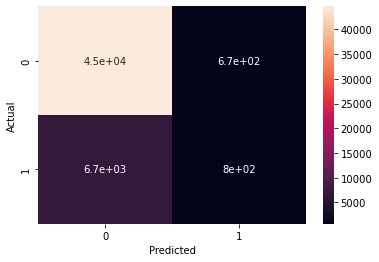

In [15]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [16]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8602498580352073


##### The accuracy is therefore 86.02% for the test set.

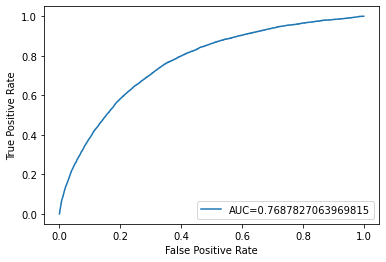

In [17]:
# Plot ROC curve and calculate AUC
#define metrics
y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

-----------------

#### Mutiple Logistics Regression 2

##### Drop two independent variables : menthlth, age65

In [18]:
X2 = df[['bmi', 'physhlth', 'michd', 'hchol', 'hblpr', 'vpa', 
      'hvdr', 'smok', 'incom50', 'cllgr','sex']]
y2 = df['diabete']

In [19]:
# fit the logistic regression model 2
logreg2 = sm.Logit(y2, X2).fit()
logreg2.summary()

Optimization terminated successfully.
         Current function value: 0.383777
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                diabete   No. Observations:               211319
Model:                          Logit   Df Residuals:                   211308
Method:                           MLE   Df Model:                           10
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                 0.05592
Time:                        17:53:49   Log-Likelihood:                -81099.
converged:                       True   LL-Null:                       -85903.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
bmi           -0.0548      0.001   -106.231      0.000      -0.056      -0.054
physhlth       0.0191      0.001     25.882      0.000       0.018       0.021
michd          0.4434      0.020     22.474      0.000       0.405       0.482
hchol          0.5896      0.013     43.857      0.000       0.563       0.616
hblpr          0.8631      0.014     62.154      0.000       0.836       0.890
vpa           -0.0005   2.43e-05    -19.006      0.000      -0.001      -0.000
hvdr          -0.9217      0.036    -25.532      0.000      -0.992      -0.851
smok          -0.4955      0.020    -24.226      0.000      -0.536      -0.455
incom50       -0.7413      0.014    -53.836      0.000      -0.768      -0.714
cllgr         -0.5084      0.014    -36.167      0.000      -0.536      -0.481
sex           -0.4386      0.012    -35.223      0.000      -0.463      -0.414
==============================================================================
"""

In [20]:
# get odds ratio
np.exp(logreg2.params)

bmi         0.946633
physhlth    1.019328
michd       1.558020
hchol       1.803294
hblpr       2.370601
vpa         0.999539
hvdr        0.397857
smok        0.609239
incom50     0.476475
cllgr       0.601480
sex         0.644949
dtype: float64

##### Training the logistic model 2

In [21]:
# Split Data into Training and Test set 2 
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.25,random_state=0)

In [22]:
logistic_regression2= LogisticRegression()
logistic_regression2.fit(X_train2,y_train2)
y_pred2=logistic_regression2.predict(X_test2)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

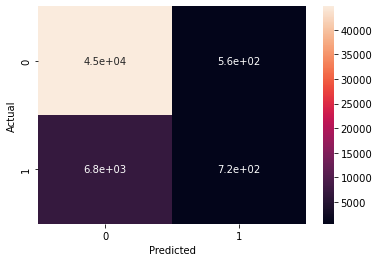

In [23]:
confusion_matrix2 = pd.crosstab(y_test2, y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True)

In [24]:
print('Accuracy: ',metrics.accuracy_score(y_test2, y_pred2))
plt.show()

Accuracy:  0.860798788567102


##### The accuracy is therefore 86.08% for the test set.

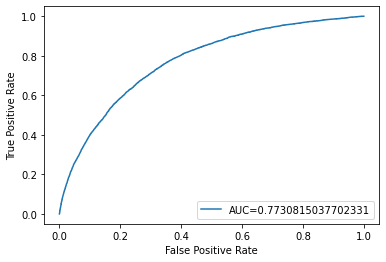

In [25]:
# Plot ROC curve and calculate AUC for logistic model 2
#define metrics
y_pred_proba2 = logistic_regression2.predict_proba(X_test2)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test2, y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test2, y_pred_proba2)

#create ROC curve
plt.plot(fpr2,tpr2,label="AUC="+str(auc2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()